# Project: Compare New York Pizza Restaurants with above average and below average ratings

This project was an assignment whilst participating in Data analytics: Elevate course offered by the education institution, Academy Xi. This project applies knowledge of python and visualisation skills, using matplotlib.

**Files**
 - 'pizza_businesses.json' is a Yelp dataset containing information about restaurants in New York City including their respective ratings.
 - 'RestaurantRatingsGH.ipynb'is a jupyter notebook containing the code.

**Case Study Business Background**
A client is considering opening a pizza restaurant in New York City. They wish to fact check the following claims:

Claim 1. The client wants to ensure they have an above average Yelp rating. They have previously owned restuarants in other cities, where a 3 was the average. They would like to know if that holds true in New York City. 

Claim 2. The client has noticed that restaurants on yelp with a high review count seem to be quite successful. They have decided to focus on maximizing their review count which they believe will allow them to have an above average overall review. 

Claim 3. After looking at a few restaurants on Yelp, your client believes that most above average restaurants have a price point of \$$.
They are considering increasing their prices from \$ to \$$ to match the majority of above average restaurants, and would like you to find the most common price point for above average restaurants in New York City.

Claim 4. In terms of location they have been told that above average restaurants are usually further east and below average are usually further west, but that the biggest difference is whether the restaurant is on the north or south side. They would like you to determine if the data supports this claim.

Claim 5. They believe that the '10012' zipcode in New York City is the best place to open a restaurant. They wish to open a restaurant in close proximity to other highly rated restaurants, and they believe '10012' has the most in NYC.

# Precursor:  Load the data & describe the Structure of the data

In [1]:
#Load the json file
import json
with open("pizza_businesses.json") as f:
    data = json.load(f)

In [2]:
# Datatype for the overall dataset
dataset_type = type(data)
# First observation
first_observation = data[0]
# Datatype for the first observation
observation_type = type(data[0])
# How many observations there are
num_observations = len(data)

print("The dataset is a:", dataset_type)
print('The observations are a:', observation_type)
print('There are:',num_observations, 'observations','\n')
print('==========================================')
print('Details of the first observation:',first_observation)
print('==========================================')

The dataset is a: <class 'list'>
The observations are a: <class 'dict'>
There are: 1000 observations 

Details of the first observation: {'name': 'Prince Street Pizza', 'review_count': 3976, 'rating': 4.5, 'price': '\\$', 'location': {'address1': '27 Prince St', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10012', 'country': 'US', 'state': 'NY', 'display_address': ['27 Prince St', 'New York, NY 10012']}, 'transactions': ['delivery', 'pickup'], 'phone': '+12129664100', 'latitude': 40.72308755605564, 'longitude': -73.99453001177575}


# Topic 1: What is the average Yelp rating for restaurants

**Claim 1:The client wants to ensure they have an above average Yelp rating. They have previously owned restuarants in other cities, where a 3 was the average. They would like to know if that holds true in New York City.**

This claim will be reviewed through a series a steps (a-b) before an observation is made. 
We will interpret a ratings histogram and observe how the visualisation relate to the client's claims.

## a) Find the possible rating options (of the restaurants). 

In [3]:
#Create the `rating_options` variable for the restaurant ratings.
#This variable will need to be in the format of a set, which ia a unique collection of the possible ratings.

rating_options = set()
# Loop over all of the observations in the dataset
for i in range(len(data)):
# Isolate the rating for the restaurant
    data[i]['rating'] 
# Add the rating to 
# the `rating_options` variable
    rating_options.add(data[i]['rating'])
rating_options
print('The current unique restaurant ratings are:',(rating_options))

The current unique restaurant ratings are: {1.0, 2.5, 3.0, 3.5, 5.0, 4.5, 4.0, 2.0}


## b) Visualisation: Plot the distribution for ratings

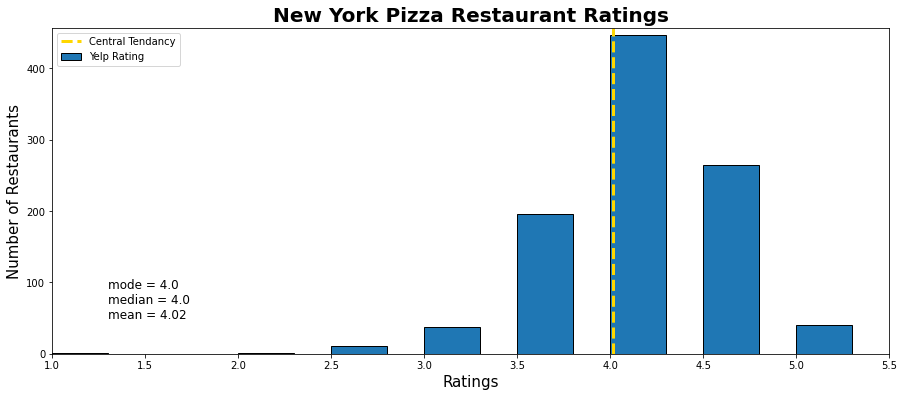

In [4]:
#Knowing what rating options are available, we can plot a histogram showing the distribution of ratings.

# Import matplotlib's pyplot module
import matplotlib.pyplot as plt

# Create an empty list. We will store all ratings in this list
ratings = []

# Loop over every restaurant in the dataset
for i in range(len(data)):
    # Isolate the rating
    r = data[i]['rating']
    # Append the rating to the `ratings` list
    ratings.append(r)
    
# Create a matplotlib subplot
%matplotlib inline
fig, ax = plt.subplots(figsize = (15,6))

# Statistics for the plot
import numpy as np

mean = sum(ratings)/len(ratings) # 4.016
median = np.median(ratings) #4.0
minimum = min(ratings) # 1
maximum = max(ratings) # 5 
#Mode
ratings_array = np.array(ratings)
values,counts = np.unique(ratings_array, return_counts=True)
index = np.argmax(counts)   
mode = values[index] #4
#Std
std = np.std(ratings_array) #0.4813979642665723
#iqr
quantile1, quantile2, quantile3 = np.percentile(ratings_array,[25,50,75]) # 4,4,4.5
iqr = (quantile3 - quantile1) #0.5

# Plot a histogram of the ratings list
bins = np.arange(min(values),max(values)+1,0.5)
ax.hist(ratings, bins = bins, edgecolor = 'black', width = 0.3)
plt.axvline(mean, color='gold', linestyle='dashed', linewidth=3)

#visualisation
ax.set_title("New York Pizza Restaurant Ratings", weight = 'bold', size =20)
ax.set_xlabel("Ratings",size = 15,)
ax.set_ylabel("Number of Restaurants", size = 15)
ax.legend(["Central Tendancy","Yelp Rating"], loc = 2)
ax.text(1.3,50,"mode = 4.0\nmedian = 4.0\nmean = 4.02",size = 12)
ax.set_xlim(min(values),max(values)+0.5)
ax.set_ylim(0,max(counts)+10);

## Observation 1: Yelp average restaurant ratings

After analysing 1,000 pizza restaurants in New York the measure of central tendancy, whether using mean, median or mode results in a Yelp rating of 4 or very close to (4.016 for the mean).  The client has restaurants in other cities, where 3 is the average. If this was an acceptable rating for the client, then their restaurant rating would be below the average for New York and their rating would be in the lower quartile of ratings. 
The visualisation from the histogram shows the most frequent rating in New York to be 4. There are a few outliers (minimum rating being 1 and maximum rating being 5), however, this is not having an impact on the mean. From the histogram you can see the majority of rating are clustered between a rating of 3.5 to 4.5. This is further confirmed by the standard deviation of 0.48 , which measures and confirms how tightly the ratings are clustered around the mean. 


# Topic 2. Restaurants with a high review count have an above average review on Yelp?

**Claim 2: The client has noticed that restaurants on yelp with a high review count seem to be quite successful. They have decided to focus on maximising their review count which they believe will allow them to have an above average overall review.**

This claim will be reviewed through a series a steps (a-d) before an observation is made. 
We will isolate the above and below average rated restaurants then isolate the review count for each group before applying some central tendency statistics. We will interpret a ratings histogram and observe how the visualisation relate to the client's claims.

## a) Isolate the restaurants with an above average rating
Now that we have an understanding for what is an average rating, we can isolate restaurants with above average and below average ratings, then complete a comparison.

In [5]:
# Create an empty list
# Store restaurants in this list - With ABOVE average ratings (at least 4.5)
above_average = []
# Loop over the dataset
for i in range(len(data)):
    # Isolate the rating
    rating = data[i]['rating']    
    # Check if the rating is at least 4.5
    if rating >= 4.5:
        # If the rating is at least 4.5
        # Add the restaurant to the list
        above_average.append(data[i])
        
print("There are", len(above_average)," restaurants with a rating of at least 4.5 star")
print("The ratings are in a ",type(above_average))
print('Each rating is a',type(above_average[0]))

There are 306  restaurants with a rating of at least 4.5 star
The ratings are in a  <class 'list'>
Each rating is a <class 'dict'>


## b) Isolate restaurants with a below average rating

In [6]:
# Create an empty list
# Store restaurants in this list - With BELOW average ratings (no more than 3.5)
below_average = []
# Loop over the restaurants in the dataset
for i in range(len(data)):
    # Isolate the rating
    rating = data[i]['rating']  
    # Check if the rating is no more than 3.5
    if rating <= 3.5:
        # If the rating no more than 3.5
        # Add the restaurant to the list
        below_average.append(data[i])

print("There are", len(below_average),"restaurants with a rating no more than 3.5 star")
print("The ratings are in a ",type(below_average))
print('Each rating is a',type(below_average[0]))

There are 247 restaurants with a rating no more than 3.5 star
The ratings are in a  <class 'list'>
Each rating is a <class 'dict'>


## c) Define a function (saving time in creating lists)

Now that we've isolated above average and below average restaurants, we need to isolate the review count of each restaurant. 
The code for isolating the review count will look very similar to code we have previously written, which is a good sign that a function should be defined!

we will define a function called isolate_values that receives two arguments:
1. A list of dictionaries
2. A string indicating the key that should be isolated for each dictionary

This function will:
- Loop over every dictionary in the inputted list
- Pull out the value assigned to the inputted key
- Append the value to a new list
- Return the new list of values

In [7]:
def isolate_values(dictionaries, key):
    # Create an empty list for storing data
    isolate_values = []
    
    # Loop over every dictionary 
    for i in range(len(dictionaries)):
        
        # Isolate the value of the dictionary with the `key`
        value = dictionaries[i][key]
     
        # Append the value to the list
        isolate_values.append(value)
    
    # Return the list of values
    return isolate_values

Now we can use the 'isolate_values' function to create a list called 'abv_avg_rev_cnts' that contains the review counts for every above average restaurant and a similar list 'blw_avg_rev_cnts' for below average restaurants.

In [8]:
abv_avg_rev_cnts = isolate_values(above_average,'review_count')
blw_avg_rev_cnts = isolate_values(below_average,'review_count')

## d) Plot a histogram of review counts & calculate the average review count
Now that we have isolated the review counts for both groups, you can calculate the average review count!

In the cell below, we plot a histogram for above average and below average restaurant review counts.
But before we do that, we should inspect the distribution of review counts to make sure 'mean' is an appropriate measure of centrality.

ABOVE AVERAGE
mean above: 189.39
median above: 65.5
mode above: 1
Std above: 394.47
Iqr above: 174.5 
 

BELOW AVERAGE
mean below: 286.0
median below: 168.0
mode below: 20
Std below: 432.59
Iqr below: 257.5


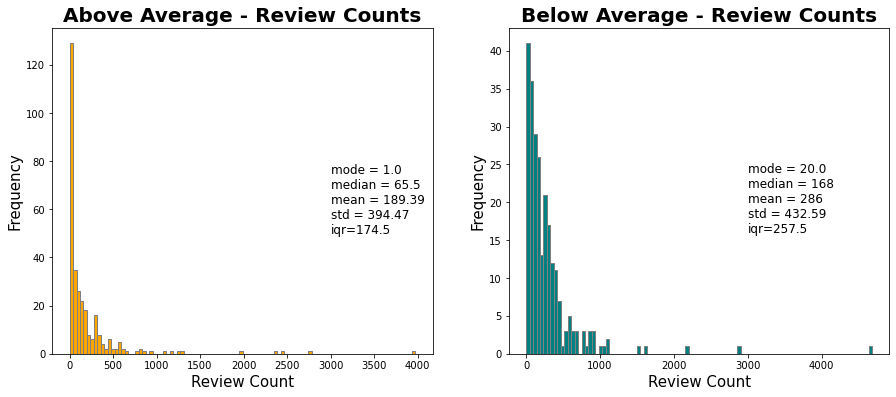

In [9]:
#Initialise a matplotlib subplot with 1 row and 2 columns
fig, ax = plt.subplots(1,2, figsize=(15,6))

#Plot a histogram of above average review counts
ax[0].hist(abv_avg_rev_cnts,bins=100,edgecolor = 'grey',color = 'orange')

ax[0].set_title("Above Average - Review Counts", weight = 'bold', size = 20)
ax[0].text(3000,50,"mode = 1.0\nmedian = 65.5\nmean = 189.39\nstd = 394.47\niqr=174.5",size = 12)
ax[0].set_xlabel("Review Count",size = 15,)
ax[0].set_ylabel("Frequency", size = 15)

#Plot a histogram of below average review counts
ax[1].hist(blw_avg_rev_cnts,bins=100,edgecolor = 'grey',color = 'teal')

ax[1].set_title("Below Average - Review Counts", weight = 'bold', size = 20) 
ax[1].text(3000,16,"mode = 20.0\nmedian = 168\nmean = 286\nstd = 432.59\niqr=257.5",size = 12)
ax[1].set_xlabel("Review Count",size = 15,)
ax[1].set_ylabel("Frequency", size = 15)

#Statistics: Central tendancy & dispersion
aac = np.array(abv_avg_rev_cnts) 
bac = np.array(blw_avg_rev_cnts)

#Above Average Dataset
print('ABOVE AVERAGE')
#mean / median
mean_above = np.mean(aac) 
median_above = np.median(aac) 
print("mean above:",mean_above.round(2)) 
print("median above:",median_above.round(2))
#mode
values_a,counts_a = np.unique(aac,return_counts=True)
index_above = np.argmax(counts_a) 
mode_above = values_a[index_above] 
print("mode above:",mode_above.round(2)) 
#Std / Iqr
std_above = np.std(aac) 
print("Std above:",std_above.round(2))
q1_above, q2_above, q3_above = np.percentile(aac,[25,50,75]) # 16.25 65.5 190.75
iqr_above = (q3_above - q1_above)
print("Iqr above:",iqr_above,"\n",'\n') #174.5

#Below Average Dataset
print('BELOW AVERAGE')
#mean / median
mean_below = np.mean(bac)
median_below = np.median(bac)
print("mean below:", mean_below.round(2)) 
print("median below:", median_below.round(2))
#mode
values_b,counts_b = np.unique(bac,return_counts=True)
index_below = np.argmax(counts_b) 
mode_below = values_b[index_below] 
print("mode below:",mode_below.round(2)) 
#Std / Iqr
std_below = np.std(bac) 
print("Std below:",std_below.round(2))
q1_below, q2_below, q3_below = np.percentile(bac,[25,50,75]) # 77.0 168.0 334.5
iqr_below = (q3_below - q1_below)
print("Iqr below:",iqr_below) #257.5;

## Observation 2: Maximising the review count = above average review? 
(Let us Interpret the above visualizations). 

Attempting to maximise review count does not necessarily translate into an above average ratings review. This is contrary to the clients observations. Lets see what statistic is best suited for these data!

First glance at the data for both histographs is skewed to the right (positively skewed).This is due to a few restaurants having a large number of review counts and this is distorting the mean and over estimating the number of reviews of a restaurant. This implies that the mean is not the best measure of tendancy for these data groups.

In a skewed distribution, the median or mode is often a preferred measure of central tendency, as the mean is not usually in the middle of the distribution and is pulled in the direction of the skew (to the right).
The data has a wide dispersion (using standard deviation) around the mean for both above & below rated restaurants. This is because outliers increases the average of the deviations, which gives the impression of a wide variability in scores. Mean and standard deviations are not the best choice for these skewed datasets.

Mode or median are best central tendancy measures when there are outliers as it is least sensitive to outliers, the mode giving the most frequency occurance of data & the median is the middle value. 

The interquartile range (IQR) may be a better measure of variability for skewed distributions with outliers as it's based on values that come from the middle half of the distribution, and is less likely to be influenced by outliers.

Examining the above average rated restaurants the mode is 1, in that the most frequent number of reviews by an above average rated restaurant is just one review. This contrasts with the below average rating restaurant in that 20 (the mode) reviews is the most common. Attempting to maximise review count does not necessarily translate into an above average ratings review.

Even if you were to dismiss the misleading result of the mean valuation, below average rated restaurants tend to have higher average count of reviews (285.99(below) vs 189.38(above)), which does not support the thesis that maximising the review count will allow the client to have an above average overall review."

# Topic 3: Find the most common price point in above average restaurants.

**Claim 3: After looking at a few restaurants on Yelp, the client believes that most above average restaurants have a price point of \$$. They are considering increasing their prices from \$ to \$$ to match the majority of above average restaurants, and would like you to find the most common price point for above average restaurants in New York City.**

The 'price' variable in the dataset is a string of dollar signs indicating how expensive a restaurant's price point is. 

This claim will be reviewed through a series a steps (a-c) before an observation is made. 
We will calculate the price point frequencies for the above and below average rated restaurants then isolate the review count for each group before applying central tendency statistics. We will interpret a bar chart and observe how the visualisation relate to the client's claims.

## a) Calculate the price point frequencies for the 'above_average' dataset.

In [10]:
# Write a for loop that counts how frequently a given price point appears for the 'above_average' dataset.

# Create an empty dictionary to store the counts for each price point
abv_avg_prices = {}

# Loop over the above average restaurants
for i in range(len(above_average)):
    # Isolate the price point for the restuarant
    above_average[i]['price']
    # Check if the price point has been added to the dictionary
    if above_average[i]['price'] in abv_avg_prices:
    
            # If the price point is already a key in the dictionary
            # Add one to the count for that price point
            abv_avg_prices[above_average[i]['price']] += 1

    # If the price point has not been added to the dictionary
    # Else set the price as the key and the value as the integer `1`
    else:
        abv_avg_prices[above_average[i]['price']] = 1

print("Number of Restaurtants at each price point:",abv_avg_prices)
print("The price points for the above average restaurants are:",abv_avg_prices.keys())
print("Check:",sum(abv_avg_prices.values()))
#print(abv_avg_prices.items())

Number of Restaurtants at each price point: {'\\$': 74, '\\$\\$': 87, 'Unknown': 134, '\\$\\$\\$': 10, '\\$\\$\\$\\$': 1}
The price points for the above average restaurants are: dict_keys(['\\$', '\\$\\$', 'Unknown', '\\$\\$\\$', '\\$\\$\\$\\$'])
Check: 306


## b) Calculate the price point frequencies for the 'below_average' dataset.

In [11]:
# Create an empty dictionary to store the counts for each price point
blw_avg_prices = {}

# Loop over the below average restaurants
for i in range(len(below_average)):

    # Isolate( the price point for the restuarant
    below_average[i]['price']
    # Check if the price point has been added to the dictionary
    if below_average[i]['price'] in blw_avg_prices:
    
            # If the price point is already a key in the dictionary
            # Add one to the count for that price point
            blw_avg_prices[below_average[i]['price']] += 1

    # If the price point has not been added to the dictionary
    # Else set the price point as the key and the value as the integer `1`
    else:
        blw_avg_prices[below_average[i]['price']] = 1

print("Number of Restaurtants at each price point:",blw_avg_prices)
print("The price points for the below average restaurants are:",blw_avg_prices.keys())
print("Check:",sum(blw_avg_prices.values()))
#print(blw_avg_prices.items())

Number of Restaurtants at each price point: {'\\$\\$': 88, '\\$': 128, 'Unknown': 19, '\\$\\$\\$': 12}
The price points for the below average restaurants are: dict_keys(['\\$\\$', '\\$', 'Unknown', '\\$\\$\\$'])
Check: 247


## c) Create a bar showing the frequency of restaurants at each price point

ABOVE AVERAGE
Sorted keys above avg: dict_items([('Unknown', 134), ('\\$', 74), ('\\$\\$', 87), ('\\$\\$\\$', 10), ('\\$\\$\\$\\$', 1)])
Above average price points: dict_keys(['Unknown', '\\$', '\\$\\$', '\\$\\$\\$', '\\$\\$\\$\\$'])
Above average frequency: dict_values([134, 74, 87, 10, 1])
Check: 306 
 

BELOW AVERAGE
Sorted keys below avg: dict_items([('Unknown', 19), ('\\$', 128), ('\\$\\$', 88), ('\\$\\$\\$', 12)])
Below average price points: dict_keys(['Unknown', '\\$', '\\$\\$', '\\$\\$\\$'])
Below average frequency: dict_values([19, 128, 88, 12])
Check: 247


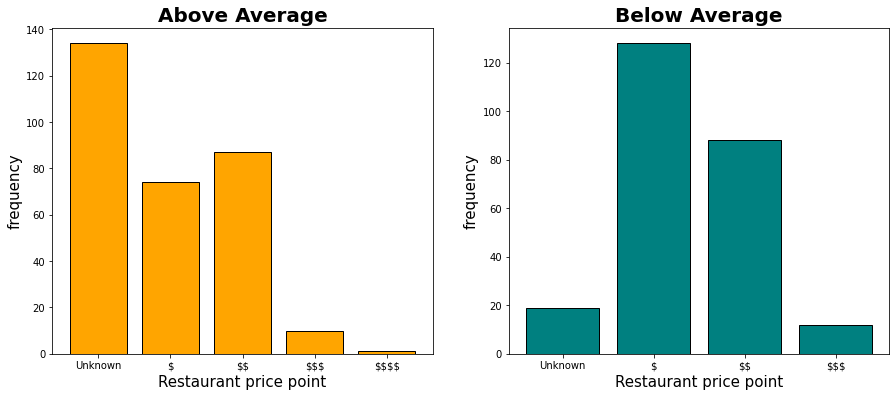

In [12]:
# Create a matplotlib subplot with 1 row and 2 columns
import numpy as np
fig, ax = plt.subplots(figsize = (15,6),nrows = 1, ncols = 2)

#Above Average 
print('ABOVE AVERAGE')
#Sort the dictionary items by key (price points)
abv_avg_prices.items()
abv_avg_prices_sorted = {key: value for key, value in sorted(abv_avg_prices.items())} 
print('Sorted keys above avg:',abv_avg_prices_sorted.items())

# Isolate keys of the above average price count dictionary
# This will be the x-axis (price points)
print('Above average price points:',abv_avg_prices_sorted.keys())
abv_x = abv_avg_prices_sorted.keys()

# Isolate the values of the above average price count dictionary
# This will be the y-axis (price point frequency)
print('Above average frequency:',abv_avg_prices_sorted.values())
print('Check:',sum(abv_avg_prices_sorted.values()),'\n','\n')
abv_y = abv_avg_prices_sorted.values()

# Plot the above average price counts as a bar plot on the first axis
ax[0].bar(abv_x,abv_y, edgecolor = 'black',color = 'orange')

ax[0].set_title("Above Average", weight = 'bold', size = 20)
ax[0].set_xlabel('Restaurant price point', size = 15);
ax[0].set_ylabel('frequency', size = 15);

#Below average
print('BELOW AVERAGE')
#Sort the dictionary items by key (by price point)
blw_avg_prices.items()
blw_avg_prices_sorted = {key: value for key, value in sorted(blw_avg_prices.items())} 
print('Sorted keys below avg:',blw_avg_prices_sorted.items())

# Isolate keys of the below average price count dictionary
# This will be the x-axis (price point)
print('Below average price points:', blw_avg_prices_sorted.keys())
blw_x = blw_avg_prices_sorted.keys()

# Isolate the values of the below average price count dictionary
# This will be the y-axis (frequency)
print('Below average frequency:',blw_avg_prices_sorted.values())
print('Check:',sum(blw_avg_prices_sorted.values()))
blw_y = blw_avg_prices_sorted.values()

# Plot the below average price point counts as a bar plot on the second axis
ax[1].bar(blw_x,blw_y,edgecolor = 'black',color = 'teal')

ax[1].set_title("Below Average",weight = 'bold', size = 20)
ax[1].set_xlabel('Restaurant price point', size = 15)
ax[1].set_ylabel('frequency', size = 15);

## Observation 3: Above average restaurant price points

Looking at the above average restaurants (plot 1), the majority of restaurants with known price points, have a price point of \$$ (87 restaurants, which represents 28.4\% of this dataset). This would appear to concur with the client claims. However, this needs to be qualified!! The largest number of above average rated restaurants have indeed an unknown price point (43.7\% of these restaurants have an unknown price point). Missing data, for whatever reason here, can skew the findings and the validity of any result. Two clear options could be to impute the data (perhaps using a central tendancy measure) or remove the data. I question any of these options are there is a large portion of missing data for any option to produce a reliable result. 

It is worth noting that below average rated restaurants have $\$$ as a most frequent price point (51.8\% of observations), though a price point of \$$ is not insignificant (35.6\% of below average rated restaurants). Intrepeting this dataset is less abstract as only 19 restaurants have an unknown price point (7.6\% of the dataset).

There is no overwhelming evidence to suggest that the majority of above average restaurants charge \$$, there are too many unknown price points for the above average rated restaurants. 
There is nothing to indicate that price points and ratings are correlated, which may imply success, as we see above (plot 2) there are a significant number of below average restaurants which charge \$$.

# Topic 4: Analyze restaurant location

**Claim 4. In terms of location the client has been told that above average restaurants are usually further east and below average are usually further west, but that the biggest difference is whether the restaurant is on the north or south side. The client would like you to determine if the data supports this claim.**

We will use the 'isolate_values' function to isolate longitude and latitude for both above and below average restaurants.

Note: The further north the higher the latitude. The further east the less negative the longitude. This makes it easier to visualise the scatter plot.

This claim will be reviewed through a series a steps (a-c) before an observation is made. 
We will plot the longitude & latitude of all New York restaurants (above and below dataset) in the same scatter chart), removing an outlier in the data for ease of intrepetation and visualising.

## a) Plot the longitude & latitude of the New York restaurants

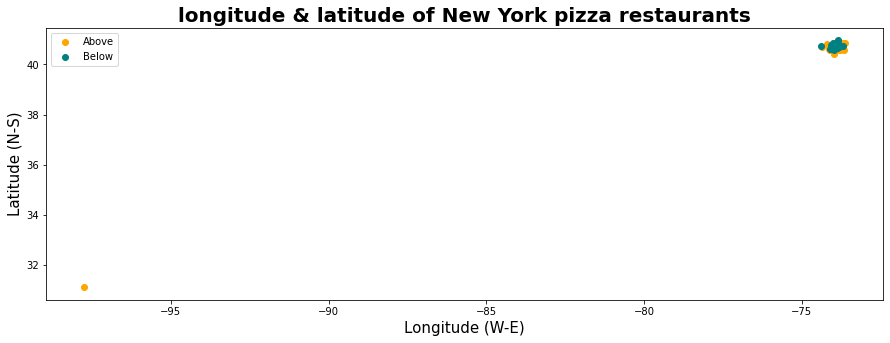

In [13]:
#Above Average 
# Isolate longitude for above average restaurants
abv_avg_lon = isolate_values(above_average,'longitude')

# Isolate latitude for above average restaurants
abv_avg_lat = isolate_values(above_average,'latitude')

#Below Average
# Isolate longitude for below average restaurants
blw_avg_lon = isolate_values(below_average,'longitude')

# Isolate latitude for below average restaurants
blw_avg_lat = isolate_values(below_average,'latitude')
 
plt.figure(figsize=(15,5))
plt.scatter(abv_avg_lon, abv_avg_lat, label='Above',color = 'orange')
plt.scatter(blw_avg_lon, blw_avg_lat, label='Below', color = 'teal')
plt.legend(loc=2)
plt.xlabel("Longitude (W-E)", size=15)
plt.ylabel('Latitude (N-S)',size=15)
plt.title("longitude & latitude of New York pizza restaurants", size=20, weight = 'bold',color = 'black');

## b) Remove the outlier (better visualise and intrepret the graph)

There is one restaurant in the above average dataset with a location dramatically west and south of all other observations. Let's remove that restaurant from the above average dataset and regenerate the scatter plot.

In [14]:
# Create an empty list that will contain data with the outlier removed
no_outliers = [] # list, however, we need make a list of dictionaries to use the isolate_values function

# Create an empty list to append the outlier
outlier = []
# Loop over every restaurant in the above average dataset
for i in range(len(above_average)):   
    
    # Isolate the restaurant's longitude
    abv_avg_lon = isolate_values(above_average,'longitude')
    abv_avg_lat = isolate_values(above_average,'latitude')
    abv_avg_name = isolate_values(above_average,'name')
    
    # Check if the longitude value is greater than the integer -90
    if abv_avg_lon[i] > float(-90.00):
        {"name":abv_avg_name[i],"longitude":abv_avg_lon[i],"latitude":abv_avg_lat[i]}
        no_outliers.append({"name":abv_avg_name[i],"longitude":abv_avg_lon[i],"latitude":abv_avg_lat[i]}) 
        
    # If longitude is less than -90 it is an outlier and should be appended to the outlier list
    else:
        outlier.append({"name":abv_avg_name[i],"longitude":abv_avg_lon[i],"latitude":abv_avg_lat[i]})

print("Outlier removed:", outlier[0].items())

#Check only one outlier removed - If the below cell runs without throwing an error, code is likely correct
assert len(no_outliers) == len(above_average) - 1
assert len(outlier) == 1

Outlier removed: dict_items([('name', 'New York Pizza'), ('longitude', -97.753939), ('latitude', 31.086427)])


Lets regenerate the longitude and latitude scatter plot for the restaurants using the the no_outliers dataset.

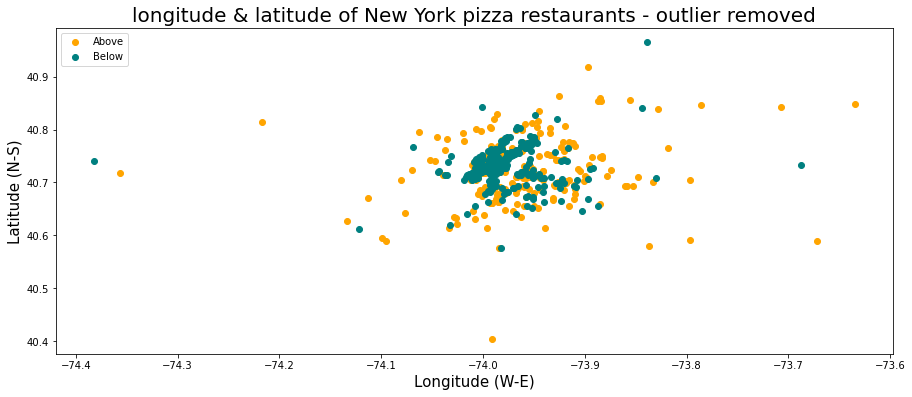

In [15]:
abv_avg_lon_no_out= isolate_values(no_outliers,'longitude')
abv_avg_lat_no_out = isolate_values(no_outliers,'latitude')

plt.figure(figsize=(15,6))
plt.scatter(abv_avg_lon_no_out, abv_avg_lat_no_out, label='Above', color ='orange')
plt.scatter(blw_avg_lon, blw_avg_lat, label='Below', color = 'teal')
plt.legend(loc=2)
plt.xlabel("Longitude (W-E)", size=15)
plt.ylabel('Latitude (N-S)',size=15)
plt.title("longitude & latitude of New York pizza restaurants - outlier removed", size=20);

This is much more interesting. 

## c) Plot the distribution of longitude and latitude

To get a better sense about how longitude and latitude are working, we plot histograms for longitude and latitude.

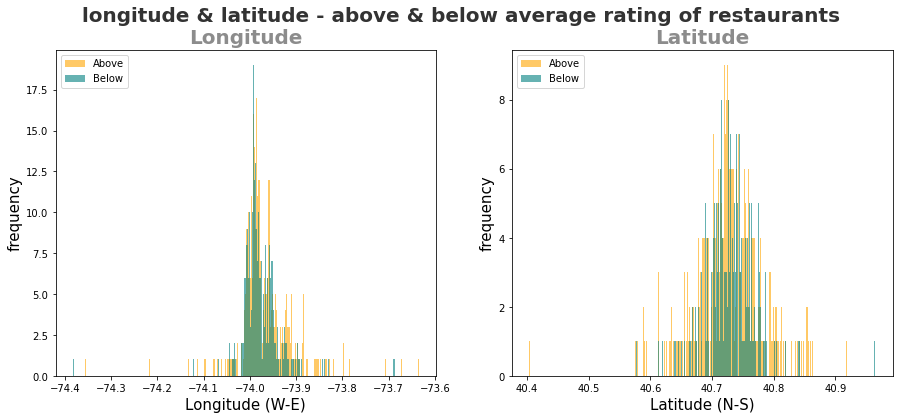

In [16]:
# Create a matplotlib subplot with 1 row and 2 columns
fig, ax = plt.subplots(figsize = (15,6), nrows =1, ncols = 2)
fig.suptitle('longitude & latitude - above & below average rating of restaurants', size = 20, weight = 'bold',color = 'black', alpha = 0.8)

# FIRST SUBPLOT - Longitude
# Plot a histogram of above and below average longitude on the first subplot axis.
ax[0].hist(abv_avg_lon_no_out, bins=300, color='orange', alpha = 0.6)
ax[0].hist(blw_avg_lon, bins=300, color='teal', alpha = 0.6)
ax[0].legend(["Above","Below"], loc = 2)

ax[0].set_title("Longitude",weight = 'bold', size = 20, color = "grey", alpha = 0.9)
ax[0].set_xlabel('Longitude (W-E)', size = 15)
ax[0].set_ylabel('frequency', size = 15)

# SECOND SUBPLOT - Latitude
# Plot a histogram of above and below average latitude on the second subplot axis. 
ax[1].hist(abv_avg_lat_no_out, bins=300, color = 'orange',alpha = 0.6)
ax[1].hist(blw_avg_lat, bins=300, color = 'teal', alpha = 0.6)
ax[1].legend(["Above","Below"], loc = 2)

ax[1].set_title("Latitude",weight = 'bold', size = 20, color = "grey", alpha = 0.9)
ax[1].set_xlabel('Latitude (N-S)', size = 15)
ax[1].set_ylabel('frequency', size = 15);


## Observation 4: Do the location coordinates of a restaurant make a difference?

First look at the histogram plots show all longitude/latitude for above/below average ratings to be normal distributions. While there are a few oultiers it does not appear to impact the distributions significantly. The histograms appear to overlay one another which would signify that there is no clear location of a restaurant, north,south,east or west with regards to an above or below rated restaurant. The statistics in the section below demonstrate how the points of central tendancy are not signifcantly different for above & below rated restaurants and the standard devaition measures are small, indicating a tight fit of values around the means.

There appears to be slightly skewed to the right in the longitude (ie more east located) but this is the same for both below & above average rated restaurants and the statistics slightly confirm this (mode -74.35/8 vs median, -73.98 ,mean -73.96/7). A large section of the histogram appears overlapping.

The latitude chart visually appears to be more normally distributed and not making it obvious that above average rating restaurants are located more north than below average rated.

Data does not appear to support the clients thesis.

In [17]:
# Statistics supporting above observation, which relate to the longitude/latitude histograms
aalon = np.array(abv_avg_lon_no_out) # above average longitude
balon = np.array(blw_avg_lon) # below average longitude
aalat = np.array(abv_avg_lat_no_out) # above average latitude
balat = np.array(blw_avg_lat) # below average latitude

amean = None
def amean(x):
    amean=np.mean(np.array(x))
    return amean

#amean(aalon) #-73.96787728751275
#amean(balon) #-73.97721755217
#amean(aalat) #40.725443617013994
#amean(balat) #40.72914576917321

amedian = None
def amedian(x):
    amedian=np.median(x)
    return amedian

#amedian(aalon) #-73.98117
#amedian(balon) #-73.9841299
#amedian(aalat) #40.7256746906384
#amedian(balat) #40.72815   

amode = None
def amode(x):
    values,counts = np.unique(x,return_counts=True)
    index = np.argmax(counts)
    amode = values[index]
    return amode

#amode(aalon) #-74.35702
#amode(balon) #-74.382549
#amode(aalat) #40.4038495
#amode(balat) #40.57641   

astd = None
def astd(x):
    astd=np.std(x)
    return astd

#astd(aalon) #0.06258590656284208
#astd(balon) #0.046680478359237096
#astd(aalat) #0.05444883535835187
#astd(balat) #0.039999382957192825 

aiqr = None
def aiqr(x):
    q1,q3 = np.percentile(x,[25,75])
    aiqr= (q3- q1)
    return aiqr

#aiqr(aalon) #0.05127110000000812
#aiqr(balon) #0.0380608344258917
#aiqr(aalat) #0.054500000000004434
#aiqr(balat) #0.044149018443796706

# Topic 5:  Most recurrent zip code for above average restaurants - is it '10012'?

**Claim 5: The client believes that the '10012' zipcode in New York City is the best place to open a restaurant. They wish to open a restaurant in close proximity to other highly rated restaurants, and they believe '10012' has the most in NYC.**

This claim will be reviewed through a series a steps (a-c) before an observation is made. We will retrieve the zip code for each above average restaurant and calculate how many restaurants are in each zip code in order to establish the most recurring zip code.

## a) Retrieve each zipcode and calculate the number of restaurants in each zipcode.
(This is for above average restaurants only)

In [18]:
# Create an empty dictionary. This dictionary will hold the counts for each zipcode
abv_avg_zip_cnts = {}

# Loop over the above average dataset
for i in range(len(above_average)):
    
    # Isolate the restaurant's zipcode 
    zip = above_average[i]['location']['zip_code']
    
    # Check if the zipcode is a key in the dictionary
    if zip in abv_avg_zip_cnts:    
        
        # Add one to the zipcode's value
        abv_avg_zip_cnts[zip] += 1
    
    # If the zipcode is not a key
    # add it to the dictionary with a value of 1
    else:
        abv_avg_zip_cnts[zip] = 1
        
print('Zip codes & the respective number of restaurants in each zip code:',abv_avg_zip_cnts)

Zip codes & the respective number of restaurants in each zip code: {'10012': 10, '11201': 8, '11211': 11, '11209': 4, '10028': 1, '11222': 8, '10014': 13, '10075': 2, '11205': 5, '10013': 9, '11217': 4, '10023': 3, '10009': 9, '10003': 10, '10016': 5, '11102': 1, '10022': 6, '11249': 1, '10010': 1, '10011': 6, '11215': 9, '10006': 2, '11237': 6, '11238': 3, '11218': 2, '10017': 5, '11101': 5, '11226': 4, '10019': 6, '10002': 9, '11231': 5, '10128': 1, '10065': 3, '11104': 3, '10001': 5, '10029': 2, '11221': 3, '76542': 1, '11373': 1, '10018': 6, '10027': 3, '11233': 2, '10032': 1, '07302': 2, '10038': 1, '11103': 3, '11385': 3, '11105': 4, '10004': 2, '10021': 1, '10036': 3, '10030': 1, '11418': 1, '10007': 3, '11207': 2, '10035': 1, '10461': 2, '11220': 1, '07094': 2, '11421': 3, '07020': 1, '07047': 5, '07305': 1, '11050': 1, '11212': 2, '11378': 3, '10454': 1, '11216': 3, '07087': 2, '11219': 2, '07901': 1, '07307': 2, '10270': 1, '11375': 1, '10302': 1, '07732': 1, '11213': 2, '100

## b) Find the zipcode with the highest number of restaurants.

Loop over the 'abv_avg_zip_cnts' dictionary and find the zipcode with the largest count.

In [19]:
ZipCode_Keys = list()
ZipCode_Values = list()
# Iterate over all the items in dictionary to find max value. get the key & respective value
for k, v in abv_avg_zip_cnts.items():
    itemMaxValue = max(abv_avg_zip_cnts.items(), key=lambda x : x[1])
    if v == itemMaxValue[1]:
        ZipCode_Keys.append(k)
        ZipCode_Values.append(v)
print('Zip code with largest count:',ZipCode_Keys)
print('Most count in this zip code: ',ZipCode_Values)

Zip code with largest count: ['10014']
Most count in this zip code:  [13]


Lets go a step further and check out the 10 most popular zipcodes, by number of restaurants. Establish if zip code 10012 is in this list.

In [20]:
# finding zipcodes with the 10 largest counts of above average restaurants
from collections import Counter
k = Counter(abv_avg_zip_cnts)
high = k.most_common(10)
print("zipcodes with the 10 largest counts of above average restaurants")
for i in high:
    print(i[0]," :",i[1]," ")

zipcodes with the 10 largest counts of above average restaurants
10014  : 13  
11211  : 11  
10012  : 10  
10003  : 10  
10013  : 9  
10009  : 9  
11215  : 9  
10002  : 9  
11201  : 8  
11222  : 8  


## c) zip code locations for below average restaurants
Lets see zip code locations for below average restaurants - does the data tell us anything

In [21]:
# Create an empty dictionary. This dictionary will hold the counts for each zip code for below average rated
blw_avg_zip_cnts = {}
# Loop over the below average dataset
for i in range(len(below_average)):
    # Isolate the restaurant's zipcode 
    zip = below_average[i]['location']['zip_code']
    # Check if the zipcode is a key in the dictionary
    if zip in blw_avg_zip_cnts:    
        # Add one to the zipcode's value
        blw_avg_zip_cnts[zip] += 1
    # If the zipcode is not a key add it to the dictionary with a value of 1
    else:
        blw_avg_zip_cnts[zip] = 1
                        
# finding zipcodes with the 10 largest counts of Below average restaurants
from collections import Counter
k = Counter(blw_avg_zip_cnts)
high = k.most_common(11)
print("zipcodes with the 10/11 largest counts of below average restaurants")
for i in high:
    print(i[0]," :",i[1]," ")

zipcodes with the 10/11 largest counts of below average restaurants
10003  : 14  
11201  : 13  
10010  : 9  
10011  : 8  
10002  : 8  
10009  : 8  
10014  : 8  
10013  : 8  
11211  : 7  
10022  : 7  
10012  : 7  


## Observation 5: How does the most frequent zipcode relate to the client's claims?

** Claim 5. "The client believes that the 10012 zipcode in New York City is the best place to open a restaurant. They wish to open a restaurant in close proximity to other highly rated restaurants, and they believe 10012 has the most in NYC."

The findings show that zip_code 10014 has the majority of above average restaurants (with a count of 13), while zip_code 10012 is still relativey popular (a count of 10) - above you can see it is the 3rd largest zipcode count when looking at above average restaurants. From the 306 above average ratings there are still 104 zipcodes included in this above ratings. It may be worth giving consideration to zipcode 10012 as 14\% (44 restaurants) of the above average restaurants are in 4 main zipcodes.

Further consideration should also be given to the location of below average restaurant ratings - are they situated in the zipcode 10014?. Yes there are 8 restaurants (out of 247) in this zip code which ranks Joint 4th most popular zip code of below average restaurants. How about zip code 10012 ? There are 7 below average restaurants in this zipcode - Joint 9th on the zip code count. There is a lot of cross over in zip codes between both above and below average datasets, which are in the top 10 locations.

# Overall Observations from the analysis

According to the data provided, the average rating for New York is 4, with the typical rating being between 3.5 to 4.5. If the client were considering to participate in the New York market, their rating would need to be higher than a 3, where 3 was the average for other cities.

There was no conclusive evidence that more review counts lead to higher average ratings, in fact below average rated restaurants tended to be reviewed more frequently - perhaps this is typical human behaviour where people over amplify on the negative side.

There was no solid conclusion when looking at certain price points for the restaurants. There was a significant lack of data for many of the restaurants price points, which would make it really hard to infer or exclude data points. While price point \$$ was most frequent for above average restaurants, the significant amount of missing data was too significant to be able to conclude with a reliable result.
It is worth noting that below average rated restaurants have \$ as a most frequesnt price point (51.8% of observations), though a price point of \$$ is not insignificant (35.6\% of below average rated restaurants).

Data suggested that longitude ot latitude of the restaurant did not determine success. Data primarily suggested that location tended to be mean orientated.

Related to the point above, the zip code of most frequent above average rating was 10014 and not the location of 10012, which the client suggested. It should be noted that zipcode 10012 had the joint 3rd most popular zipcode of above average restaurants.  We should acknowledge that the location of the above average rated restaurants were many (104 zipcodes in total). It is finally worth bearing in mind that these top zip codes also had a generous quantity of below average rated restaurants.

The client should consider whether there were other factors involved in the success of a restaurant. Does the rating determine success - this is not concluded by pricing, review counts or location?